## ЧАСТЬ A

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import umap.plot
from collections import Counter
matplotlib.style.use('fivethirtyeight')

## Извлечение датасета

In [2]:
#Заголовки данных согласно файлу с описанием glass.tag --Variant 11
data_headers = ["ID", "RI", "NA2O", "MGO", "AL2O3", "SIO2", "K2O", "CAO", "BAO", "FE2O3", "TYPE"]
data = pd.read_csv('C:/Учеба/Мага/1 семестр/Интеллектуальные системы и технологии/Практика 3-4/glass.data', names=data_headers)
data.head(10)

,ID,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


## Соответствие значений столбца TYPE и названий типов

In [3]:
types = data.iloc[:,10]
types_name = {1: "building_windows_float_processed",
            2 : "building_windows_non_float_processed",
            3 : "vehicle_windows_float_processed",
            5 : "containers",
            6 : "tableware",
            7 :"headlamps"}

## Предварительно масштабируем данные

In [4]:
data_x = data.iloc[:, 1:-1].values
scaler = preprocessing.StandardScaler()
data_scaled = scaler.fit_transform(data_x)
print('Исходные данные')
print(data_x)
print('\nПосле масштабирования')
print(data_scaled)

Исходные данные
[[ 1.52101 13.64     4.49    ...  8.75     0.       0.     ]
 [ 1.51761 13.89     3.6     ...  7.83     0.       0.     ]
 [ 1.51618 13.53     3.55    ...  7.78     0.       0.     ]
 ...
 [ 1.52065 14.36     0.      ...  8.44     1.64     0.     ]
 [ 1.51651 14.38     0.      ...  8.48     1.57     0.     ]
 [ 1.51711 14.23     0.      ...  8.62     1.67     0.     ]]

После масштабирования
[[ 0.87286765  0.28495326  1.25463857 ... -0.14576634 -0.35287683
  -0.5864509 ]
 [-0.24933347  0.59181718  0.63616803 ... -0.79373376 -0.35287683
  -0.5864509 ]
 [-0.72131806  0.14993314  0.60142249 ... -0.82894938 -0.35287683
  -0.5864509 ]
 ...
 [ 0.75404635  1.16872135 -1.86551055 ... -0.36410319  2.95320036
  -0.5864509 ]
 [-0.61239854  1.19327046 -1.86551055 ... -0.33593069  2.81208731
  -0.5864509 ]
 [-0.41436305  1.00915211 -1.86551055 ... -0.23732695  3.01367739
  -0.5864509 ]]


## Разбиваем данные на обучающую и тестовую выборку

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled,
                                                    types,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    stratify=types,
                                                    random_state=151)

## Обучение модели linear

In [ ]:
C = 1.0  # Параметр регуляризации
svm = SVC(kernel='linear', C=C).fit(X_train,y_train)

Точность предсказания, Precision, Recall, F1 measure для обучающей выборки\
Accuracy: 0.7046979865771812\
Precision: 0.6642480885898319\
Recall: 0.7046979865771812\
F1 measure: 0.6803987663305248

Точность предсказания, Precision, Recall, F1 measure для тестовой выборки\
Accuracy: 0.6615384615384615\
Precision: 0.6401193633952253\
Recall: 0.6615384615384615\
F1 measure: 0.6339250493096646

## Обучение модели RBF

In [ ]:
C = 1.0  # Параметр регуляризации
svm = SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train,y_train)

Точность предсказания, Precision, Recall, F1 measure для обучающей выборки\
Accuracy: 0.8657718120805369\
Precision: 0.8660878519938923\
Recall: 0.8657718120805369\
F1 measure: 0.8572198573993356

Точность предсказания, Precision, Recall, F1 measure для тестовой выборки\
Accuracy: 0.676923076923077\
Precision: 0.6130399012751954\
Recall: 0.676923076923077\
F1 measure: 0.6317925179675487

## Обучение полиномиальной модели

In [6]:
C = 1.0  # Параметр регуляризации
# Grid search считает полиномиальную модель лучшей с параметрами c=1.0, degree=2.0, gamma = 2.4
svm = SVC(kernel='poly', degree=2.0, gamma = 2.4, C=C).fit(X_train,y_train)

Точность предсказания, Precision, Recall, F1 measure для обучающей выборки\
Accuracy: 0.9328859060402684\
Precision: 0.9341117765395559\
Recall: 0.9328859060402684\
F1 measure: 0.9327306972384667

Точность предсказания, Precision, Recall, F1 measure для тестовой выборки\
Accuracy: 0.6615384615384615\
Precision: 0.6292307692307691\
Recall: 0.6615384615384615\
F1 measure: 0.636613416982774

## Обучение сигмоидальной модели

In [ ]:
C = 1.0  # Параметр регуляризации
svm = SVC(kernel='sigmoid', gamma=0.7, C=C).fit(X_train,y_train)

Точность предсказания, Precision, Recall, F1 measure для обучающей выборки\
Accuracy: 0.40939597315436244\
Precision: 0.3500585916693299\
Recall: 0.40939597315436244\
F1 measure: 0.3759805235142937

Точность предсказания, Precision, Recall, F1 measure для тестовой выборки\
Accuracy: 0.4153846153846154\
Precision: 0.36713286713286714\
Recall: 0.4153846153846154\
F1 measure: 0.38616992763334224

## Предсказание на тестовой выборке

In [7]:
y_test_pred = svm.predict(X_test)

## Точность предсказания, Precision, Recall, F1 measure для обучающей выборки

In [8]:
from sklearn import metrics
y_train_pred = svm.predict(X_train)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_train, y_train_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_train, y_train_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("F1 measure:",metrics.f1_score(y_train, y_train_pred, average='weighted'))

Accuracy: 0.9328859060402684
Precision: 0.9341117765395559
Recall: 0.9328859060402684
F1 measure: 0.9327306972384667


## Точность предсказания, Precision, Recall, F1 measure для тестовой выборки

In [9]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_test_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_test_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("F1 measure:",metrics.f1_score(y_test, y_test_pred, average='weighted'))

Accuracy: 0.6615384615384615
Precision: 0.6292307692307691
Recall: 0.6615384615384615
F1 measure: 0.636613416982774


c:\users\fisen\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Опорные вектора

In [10]:
# get support vectors
print("Support Vectors")
print(svm.support_vectors_)

# get indices of support vectors
print("\nIndices of support vectors")
print(svm.support_)

# get number of support vectors for each class
print("\nNumber of support vectors for each class")
print(svm.n_support_)

Support Vectors
[[ 4.27287791e-01  1.67197817e+00  7.40404638e-01 -2.31861565e+00
  -8.16496476e-01 -7.17812052e-01  3.03117633e-02 -3.52876828e-01
  -5.86450902e-01]
 [-1.73419864e-01 -4.02421917e-01  5.59727851e-01 -3.31069983e-01
   2.70552898e-01  1.58213102e-01 -3.28887568e-01 -3.52876828e-01
  -5.86450902e-01]
 [-2.26229329e-01 -9.30227857e-01  6.08371602e-01 -2.90917546e-01
   5.55256306e-01  1.73581964e-01 -1.88025085e-01 -3.52876828e-01
   8.53718690e-01]
 [-2.85639976e-01 -7.21560392e-01  6.01422494e-01  9.05306132e-02
   1.28201195e-01  6.59999275e-02 -3.07758196e-01 -3.52876828e-01
   1.36806497e+00]
 [-7.21318056e-01  1.49933137e-01  6.01422494e-01  1.90911708e-01
   4.38786730e-01 -1.64533008e-01 -8.28949383e-01 -3.52876828e-01
  -5.86450902e-01]
 [ 4.63594298e-01  4.93620726e-01  6.22269816e-01 -2.50765108e-01
  -1.20472840e+00 -5.79492291e-01 -2.02111334e-01  1.03809467e+00
  -5.86450902e-01]
 [-2.32830512e-01 -2.42852679e-01  6.98709995e-01 -3.10993765e-01
  -5.2973701

## Grid search

In [11]:
grid_params = {
    'kernel':('linear', 'rbf','poly', 'sigmoid'),
    'C':[1.0,2.0,3.0,10.0],
    'gamma':[x/10 for x in range(1, 30)],
    'degree':[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
}

gs = GridSearchCV(SVC(),
    grid_params,
    verbose=1,
    cv=3,
    n_jobs=-1)

gs_results = gs.fit(X_train, y_train)
#Fitting 3 folds for each of 4176 candidates, totalling 12528 fits

Fitting 3 folds for each of 4176 candidates, totalling 12528 fits


In [12]:
gs_results.best_score_
#0.7183673469387756

0.7183673469387756

In [13]:
gs_results.best_estimator_
#SVC(degree=2.0, gamma=2.4, kernel='poly')

SVC(degree=2.0, gamma=2.4, kernel='poly')

In [14]:
gs_results.best_params_
#{'C': 1.0, 'degree': 2.0, 'gamma': 2.4, 'kernel': 'poly'}

{'C': 1.0, 'degree': 2.0, 'gamma': 2.4, 'kernel': 'poly'}

## Снижение размерности обучающих данных для рисования при помощи TSNE

In [15]:
train_tsne = TSNE(init='random', perplexity=12.0, random_state = 151).fit_transform(X_train)

c:\users\fisen\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


## Отображение обучающего набора данных

[Text(0.5, 1.0, 'T-SNE projection of training data')]

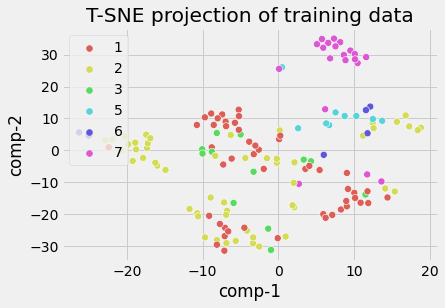

In [16]:
train_tsne_df = pd.DataFrame()
train_tsne_df["y"] = y_train
train_tsne_df["comp-1"] = train_tsne[:,0]
train_tsne_df["comp-2"] = train_tsne[:,1]
sns.scatterplot(x="comp-1",
                y="comp-2",
                hue=train_tsne_df.y.tolist(),
                palette=sns.color_palette("hls", len(Counter(train_tsne_df.y.tolist()))),
                data=train_tsne_df,
                s=50).set(title="T-SNE projection of training data") 

## Отображение результата классификации обучающего набора данных

[Text(0.5, 1.0, 'T-SNE projection of prediction on training data')]

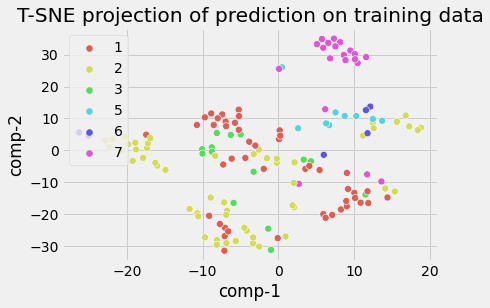

In [17]:
sns.scatterplot(x="comp-1",
                y="comp-2",
                hue=y_train_pred,
                palette=sns.color_palette("hls", len(Counter(y_train_pred))),
                data=train_tsne_df,
                s=50).set(title="T-SNE projection of prediction on training data") 

## Снижение размерности тестовых данных для отображения при помощи TSNE

In [18]:
test_tsne = TSNE(init='random', perplexity=20.0, random_state = 151).fit_transform(X_test)

c:\users\fisen\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


## Отображение тестового набора данных

[Text(0.5, 1.0, 'T-SNE projection of test data')]

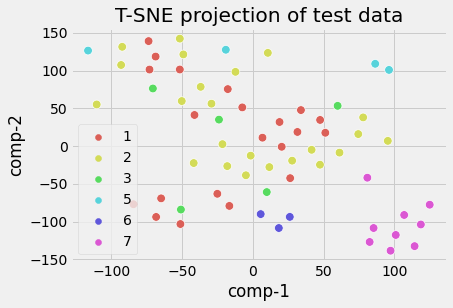

In [19]:
test_tsne_df = pd.DataFrame()
test_tsne_df["y"] = y_test
test_tsne_df["comp-1"] = test_tsne[:,0]
test_tsne_df["comp-2"] = test_tsne[:,1]
sns.scatterplot(x="comp-1",
                y="comp-2",
                hue=test_tsne_df.y.tolist(),
                palette=sns.color_palette("hls", len(Counter(test_tsne_df.y.tolist()))),
                data=test_tsne_df,
                s=75).set(title="T-SNE projection of test data") 

## Отображение результата классификации тестового набора данных

[Text(0.5, 1.0, 'T-SNE projection of prediction on test data')]

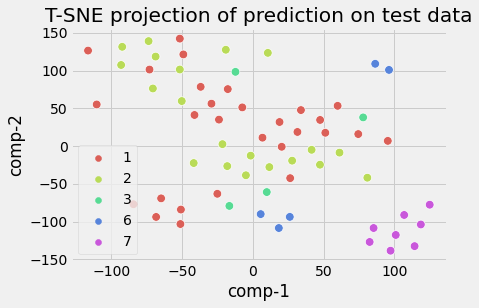

In [20]:
sns.scatterplot(x="comp-1",
                y="comp-2",
                hue=y_test_pred,
                palette=sns.color_palette("hls", len(Counter(y_test_pred))),
                data=test_tsne_df,
                s=75).set(title="T-SNE projection of prediction on test data") 

## Примечания

В датасете представлено 6 категорий стекол:

1: "building_windows_float_processed" - 70 экземпляров\
2 : "building_windows_non_float_processed" - 76 экземпляров\
3 : "vehicle_windows_float_processed" - 17 экземпляров\
5 : "containers" - 13 экземпляров\
6 : "tableware" - 9 экземпляров\
7 :"headlamps" - 29 экземпляров\

Первые две категории преобладают над остальными данными, в связи с чем все объекты некоторых классов попадают в другие классы.\
3 и 5 категории при классификации тестовых данных RBF моделью отсутствуют на графике.